<a href="https://colab.research.google.com/github/DataCrusade1999/silver-umbrella/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import itertools
import tensorflow as tf
from tensorflow import keras
from random import randint
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

**DATA**

In [ ]:
train_labels=[]
train_samples=[]
for i in range(50):
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)
  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)
for i in range(1000):
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)
  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)
  

In [ ]:
test_labels=[]
test_samples=[]
for i in range(50):
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)
  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)
for i in range(200):
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)
  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [ ]:
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels,train_samples=shuffle(train_labels,train_samples)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_sample=scaler.fit_transform(train_samples.reshape(-1,1))

In [ ]:
test_labels=np.array(test_labels)
test_samples=np.array(test_samples)
test_labels,test_samples=shuffle(test_labels,test_samples)
scaled_test_sample=scaler.fit_transform(test_samples.reshape(-1,1))

**MODEL TRAINING**

In [ ]:
model=Sequential([Dense(units=16,input_shape=(1,),activation='relu'),Dense(units=32,activation='relu'),Dense(units=2,activation='softmax')])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_34 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_train_sample,y=train_labels,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.6804 - accuracy: 0.5312 - val_loss: 0.6689 - val_accuracy: 0.6286
Epoch 2/30
189/189 - 0s - loss: 0.6616 - accuracy: 0.6571 - val_loss: 0.6467 - val_accuracy: 0.7000
Epoch 3/30
189/189 - 0s - loss: 0.6372 - accuracy: 0.7365 - val_loss: 0.6212 - val_accuracy: 0.7905
Epoch 4/30
189/189 - 0s - loss: 0.6101 - accuracy: 0.7862 - val_loss: 0.5952 - val_accuracy: 0.8238
Epoch 5/30
189/189 - 0s - loss: 0.5813 - accuracy: 0.8249 - val_loss: 0.5670 - val_accuracy: 0.8286
Epoch 6/30
189/189 - 0s - loss: 0.5500 - accuracy: 0.8534 - val_loss: 0.5370 - val_accuracy: 0.8381
Epoch 7/30
189/189 - 0s - loss: 0.5173 - accuracy: 0.8735 - val_loss: 0.5069 - val_accuracy: 0.8381
Epoch 8/30
189/189 - 0s - loss: 0.4849 - accuracy: 0.8862 - val_loss: 0.4784 - val_accuracy: 0.8619
Epoch 9/30
189/189 - 0s - loss: 0.4541 - accuracy: 0.8995 - val_loss: 0.4520 - val_accuracy: 0.8714
Epoch 10/30
189/189 - 0s - loss: 0.4260 - accuracy: 0.9074 - val_loss: 0.4283 - val_accuracy: 0.8714

**PREDICTIONS**

In [ ]:
predictions=model.predict(x=scaled_test_sample,batch_size=10,verbose=0)

In [ ]:
rounded_predictions=np.argmax(predictions,axis=-1) #Easy To Interpret We Can loop(for) Through It

**CONFUSION MATRIX**

In [ ]:
cm=confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[194  56]
 [ 49 201]]


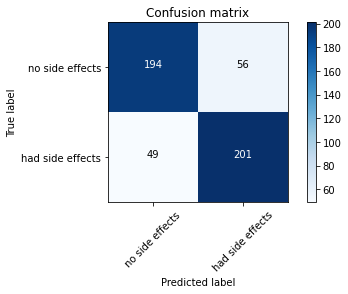

In [ ]:
cm_plot_label=['no side effects','had side effects']
plot_confusion_matrix(cm=cm,classes=cm_plot_label)

**SAVING THE MODEL**

In [ ]:
import os.path
model.save('saved_model/my_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
N_model=load_model('saved_model/my_model.h5')


In [ ]:
N_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_34 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
N_model.get_weights()

In [ ]:
N_model.optimizer